## Loading the dataset


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the data 
df = pd.read_csv('../data/student/student-mat.csv', sep=';')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


## Data Cleaning 


In [16]:
df.info()
df.describe()
df.isnull().sum()

df = df.drop(['G1', 'G2'], axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

## Encoding Categorical Features

In [17]:
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,True,False,True,False,False,False,True,True,False,False
1,17,1,1,1,2,0,5,3,3,1,...,False,False,False,True,False,False,False,True,True,False
2,15,1,1,1,2,3,4,3,2,2,...,True,False,True,False,True,False,True,True,True,False
3,15,4,2,1,3,0,3,2,2,1,...,True,False,False,True,True,True,True,True,True,True
4,16,3,3,1,2,0,4,3,2,1,...,False,False,False,True,True,False,True,True,False,False


## Exploratory Data Analysis (EDA)


Visualizing relationships between key variables and the final grade (G3).
- The correlation heatmap shows overall feature relationships.
- Boxplots and barplots display how failures, socializing (goout), parental education, and urban/rural address affect G3.


These plots help identify patterns before building the regression model.


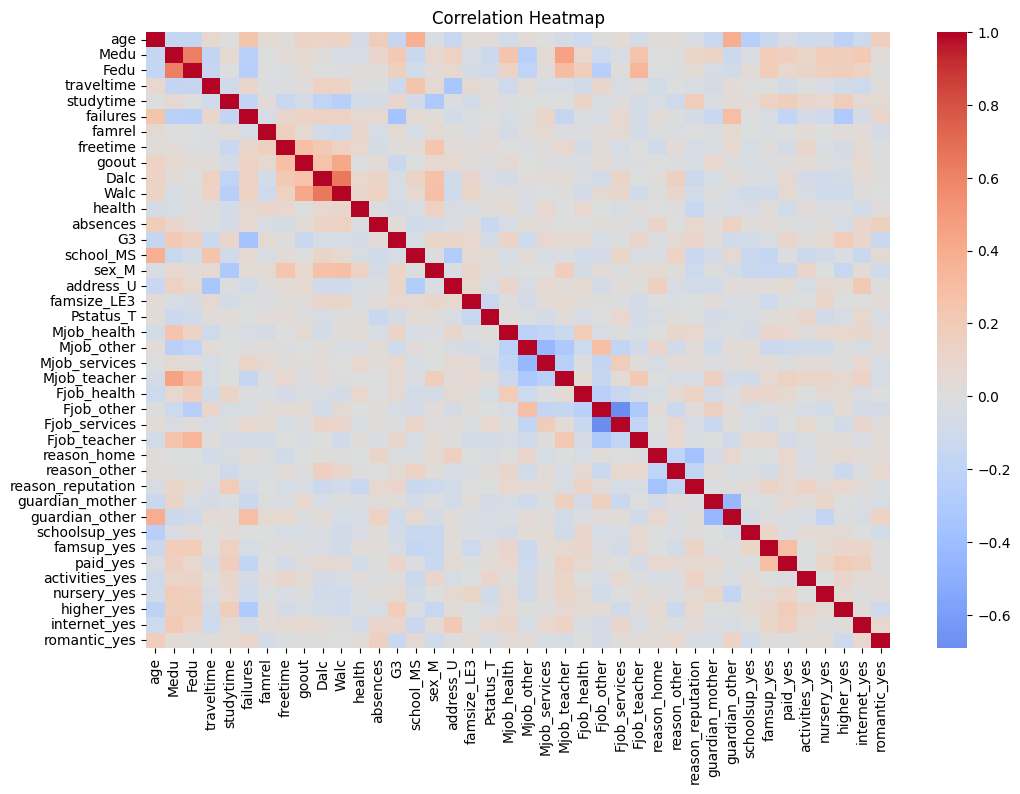

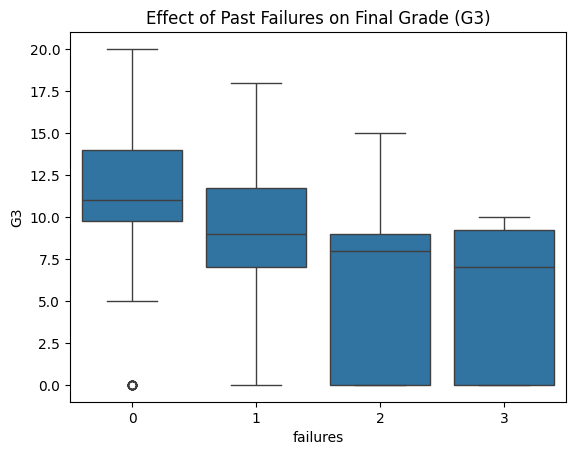

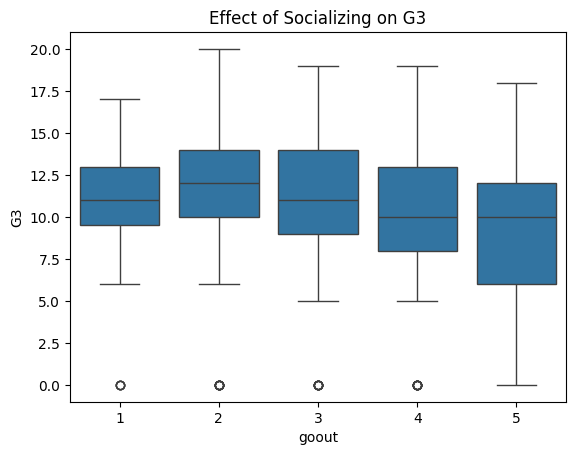

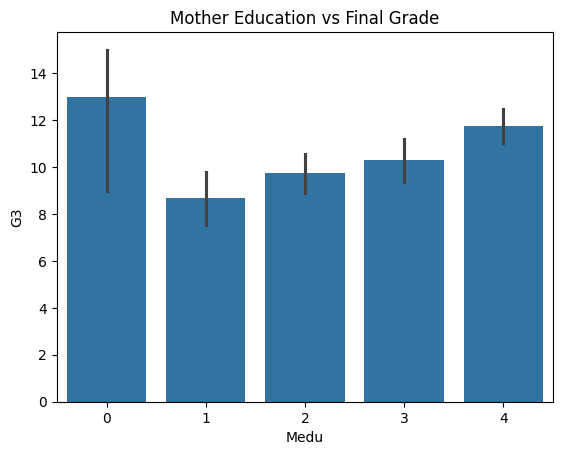

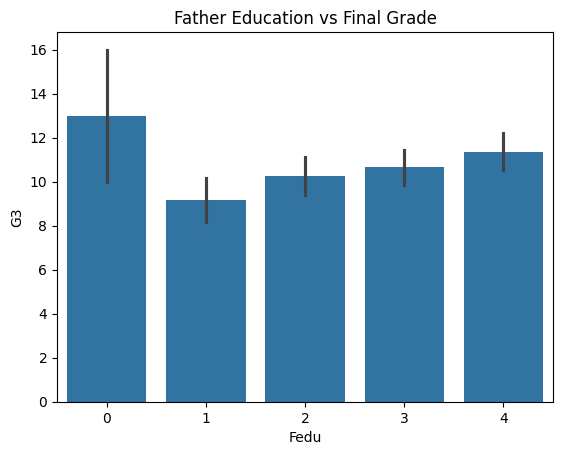

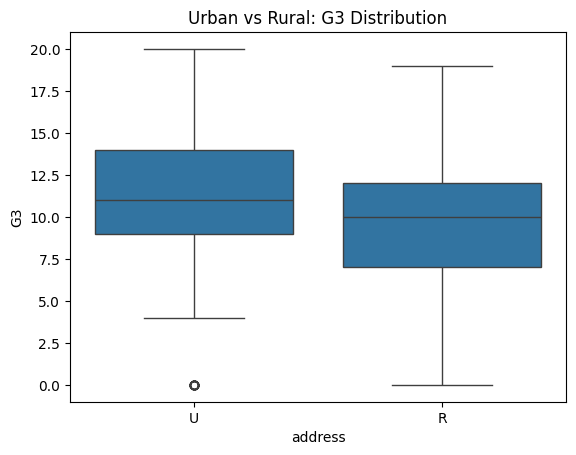

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df_encoded.corr(), cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

# Relationship between failures and G3
sns.boxplot(x='failures', y='G3', data=df)
plt.title('Effect of Past Failures on Final Grade (G3)')
plt.show()

# Relationship between socializing (goout) and G3
sns.boxplot(x='goout', y='G3', data=df)
plt.title('Effect of Socializing on G3')
plt.show()

# Parental education
sns.barplot(x='Medu', y='G3', data=df, estimator=np.mean)
plt.title('Mother Education vs Final Grade')
plt.show()

sns.barplot(x='Fedu', y='G3', data=df, estimator=np.mean)
plt.title('Father Education vs Final Grade')
plt.show()

# Urban vs Rural
sns.boxplot(x='address', y='G3', data=df)
plt.title('Urban vs Rural: G3 Distribution')
plt.show()

## Model Building (Linear Regression)

- Splitting the data into training (80%) and testing (20%) sets using train_test_split.
- Using a Linear Regression model since the target variable G3 is continuous.
- Training the model on X_train, y_train and evaluated on X_test, y_test to predict student final grades.

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

X = df_encoded.drop('G3', axis=1)
y = df_encoded['G3']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

/Users/aryaapareshdeshpande/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/aryaapareshdeshpande/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/aryaapareshdeshpande/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_


## Model Evaluation

- R^2 : measures how much variance in G3 is explained by the model.
- RMSE (Root Mean Squared Error): shows the average prediction error in grade points.


In [20]:
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"R²: {r2:.3f}")
print(f"RMSE: {rmse:.3f}")

R²: 0.141
RMSE: 4.196


## Feature Coefficients and Interpretation

In [21]:
coeff_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

coeff_df.head(15)

,Feature,Coefficient
36,higher_yes,1.750880
14,sex_M,1.495911
18,Mjob_health,1.122322
30,guardian_other,0.965251
25,Fjob_teacher,0.939985
33,paid_yes,0.770306
4,studytime,0.757643
13,school_MS,0.726392
37,internet_yes,0.721836
16,famsize_LE3,0.696373


## Model Performance and Key Feature Insights

In [22]:
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("R^2:", r2)
print("RMSE:", rmse)

coeff_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

coeff_df.loc[coeff_df['Feature'].isin(['failures', 'goout', 'Medu', 'Fedu', 'address_U'])]

R^2: 0.14149247411195787
RMSE: 4.1956808027213786


,Feature,Coefficient
1,Medu,0.467016
15,address_U,0.343715
2,Fedu,-0.149770
8,goout,-0.418101
5,failures,-1.854106


## Urban vs Rural Grade Comparison

In [23]:
df.groupby('address')['G3'].mean()

address
R     9.511364
U    10.674267
Name: G3, dtype: float64